# Simulate a function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

## Models

### Model 1

In [2]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.l1 = nn.Linear(1, 5)
        self.l2 = nn.Linear(5, 10)
        self.l3 = nn.Linear(10, 10)
        self.l4 = nn.Linear(10, 10)
        self.l5 = nn.Linear(10, 10)
        self.l6 = nn.Linear(10, 10)
        self.l7 = nn.Linear(10, 5)
        self.l8 = nn.Linear(5, 1)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = F.leaky_relu(self.l3(x))
        x = F.leaky_relu(self.l4(x))
        x = F.leaky_relu(self.l5(x))
        x = F.leaky_relu(self.l6(x))
        x = F.leaky_relu(self.l7(x))
        x = self.l8(x)
        return x

### Model 2

In [3]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.l1 = nn.Linear(1, 10)
        self.l2 = nn.Linear(10, 18)
        self.l3 = nn.Linear(18, 15)
        self.l4 = nn.Linear(15, 4)
        self.l5 = nn.Linear(4, 1)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = F.leaky_relu(self.l3(x))
        x = F.leaky_relu(self.l4(x))
        x = self.l5(x)
        return x

### Model 3

In [4]:
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.l1 = nn.Linear(1, 190)
        self.l2 = nn.Linear(190, 1)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = self.l2(x)
        return x

## Training Function

In [5]:
def train(model, args, x, y):
    model.train()
    loss_func = nn.MSELoss()
    optimizer = optim.Adam(
        model.parameters(), lr=args["lr"], weight_decay=args["weight_decay"]
    )
    training_loss = []
    epochs = 200000
    for curr_epoch in range(epochs):
        output = model(x)
        loss = loss_func(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        curr_epoch += 1

        training_loss.append(loss.item())
        if (curr_epoch + 1) % 1000 == 0:
            print(f"epoch:{curr_epoch+1},loss={loss.item():.6f}")

        if training_loss[-1] <= 1e-3:
            break

    return training_loss, output

## Plot Functions

In [6]:
def plot_losses(losses):
    for index, loss in enumerate(losses):
        plt.plot(np.arange(1, len(loss) + 1), loss, label="Model" + str(index + 1))
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
    plt.title("All Model Loss")
    plt.legend()
    plt.show()

In [7]:
def plot_predictions(x, y, predictions):
    plt.plot(x, y, label="Ground-Truth")
    plt.xlabel("x")
    plt.ylabel("y")

    for index, prediction in enumerate(predictions):
        plt.plot(x, prediction.detach().numpy(), label="Model" + str(index + 1))
        plt.xlabel("x")
        plt.ylabel("y")

    plt.title("All Model Prediction")
    plt.legend()
    plt.show()

## Function 1

$$\frac{\sin{(5\pi x)}}{5\pi x}$$

In [8]:
x = torch.linspace(-1, 1, 500, dtype=torch.float).unsqueeze(1)
y = (np.sin(5 * np.pi * x)) / (5 * np.pi * x)

Text(0.5, 1.0, 'Function 1')

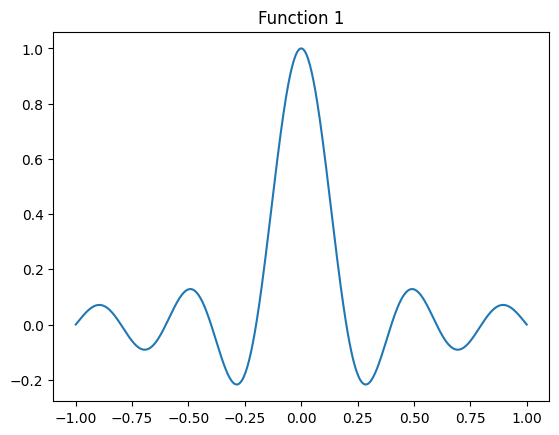

In [9]:
plt.plot(x, y)
plt.title("Function 1")

In [10]:
losses = []
predictions = []

In [11]:
args = {"lr": 5e-5, "weight_decay": 1e-4}

### Model 1

In [12]:
loss, prediction = train(Model1(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.086847
epoch:2000,loss=0.078165
epoch:3000,loss=0.056069
epoch:4000,loss=0.043564
epoch:5000,loss=0.032728
epoch:6000,loss=0.025429
epoch:7000,loss=0.020284
epoch:8000,loss=0.015843
epoch:9000,loss=0.011955
epoch:10000,loss=0.007682
epoch:11000,loss=0.002286


Text(0.5, 1.0, 'Model 1 Loss')

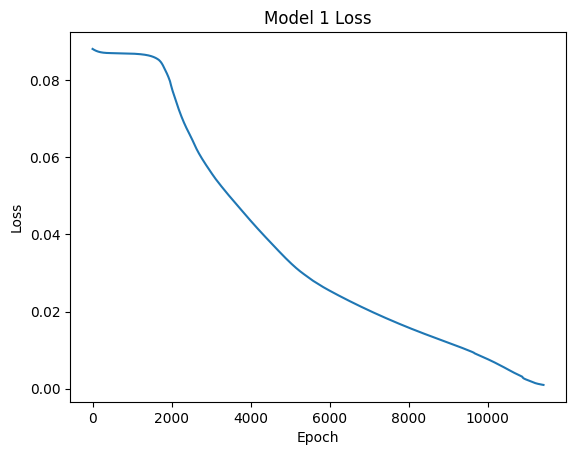

In [13]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 1 Loss")

Text(0.5, 1.0, 'Model 1 Prediction')

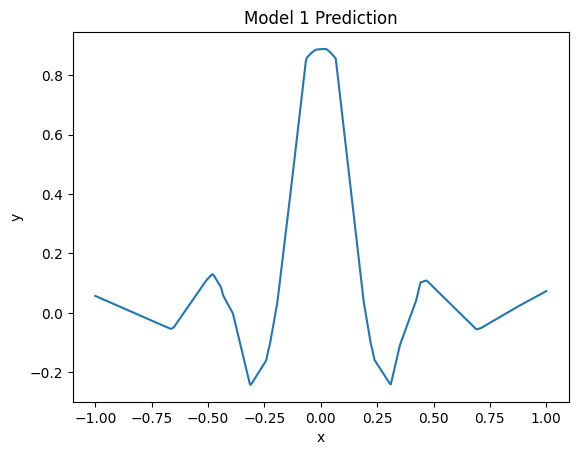

In [14]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 1 Prediction")

### Model 2

In [15]:
loss, prediction = train(Model2(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.098609
epoch:2000,loss=0.077995
epoch:3000,loss=0.070797
epoch:4000,loss=0.063044
epoch:5000,loss=0.055154
epoch:6000,loss=0.039359
epoch:7000,loss=0.022996
epoch:8000,loss=0.009175
epoch:9000,loss=0.005808
epoch:10000,loss=0.005352
epoch:11000,loss=0.005119
epoch:12000,loss=0.004694
epoch:13000,loss=0.004393
epoch:14000,loss=0.004180
epoch:15000,loss=0.004010
epoch:16000,loss=0.003751
epoch:17000,loss=0.002974
epoch:18000,loss=0.002027
epoch:19000,loss=0.001079


Text(0.5, 1.0, 'Model 2 Loss')

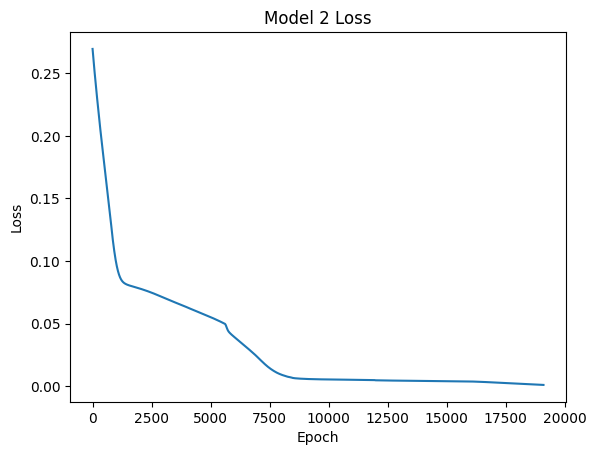

In [16]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 2 Loss")

Text(0.5, 1.0, 'Model 2 Prediction')

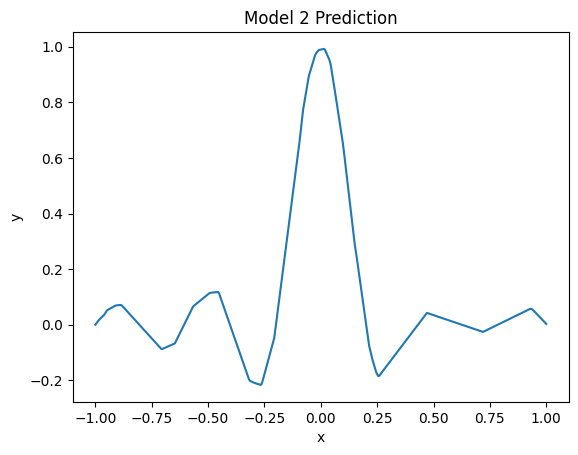

In [17]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 2 Prediction")

### Model 3

In [18]:
loss, prediction = train(Model3(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.066124
epoch:2000,loss=0.052866
epoch:3000,loss=0.040763
epoch:4000,loss=0.030546
epoch:5000,loss=0.022318
epoch:6000,loss=0.016012
epoch:7000,loss=0.011248
epoch:8000,loss=0.007816
epoch:9000,loss=0.005493
epoch:10000,loss=0.004068
epoch:11000,loss=0.003090
epoch:12000,loss=0.002446
epoch:13000,loss=0.001980
epoch:14000,loss=0.001619
epoch:15000,loss=0.001335
epoch:16000,loss=0.001114


Text(0.5, 1.0, 'Model 3 Loss')

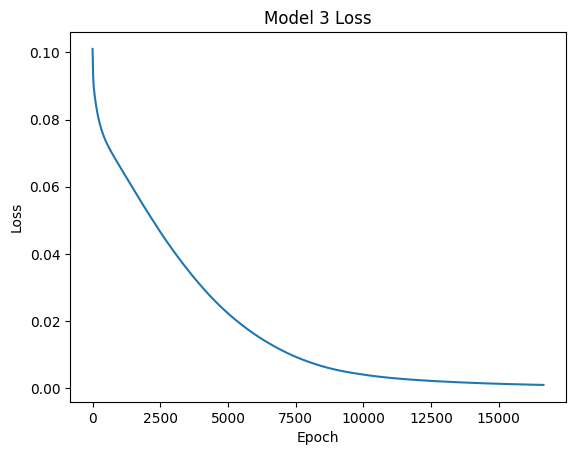

In [19]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 3 Loss")

Text(0.5, 1.0, 'Model 3 Prediction')

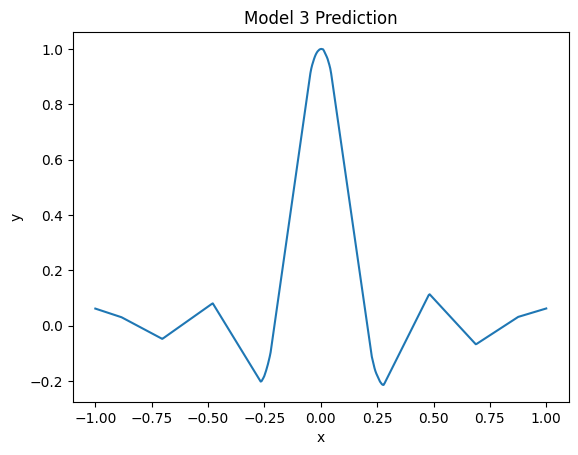

In [20]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 3 Prediction")

### Result

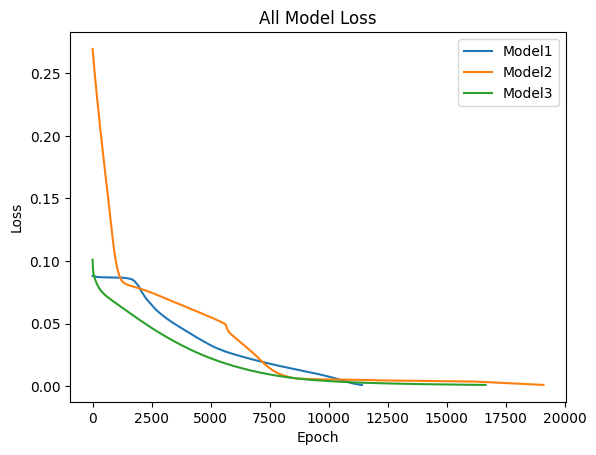

In [21]:
plot_losses(losses)

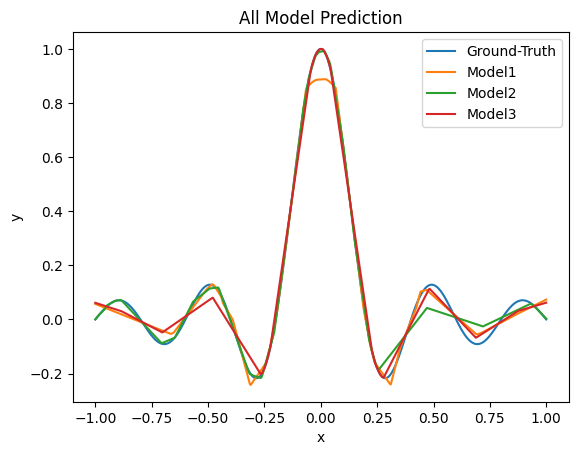

In [22]:
plot_predictions(x, y, predictions)

## Function 2

$$(\sin(5 \pi x))$$

In [23]:
x = torch.linspace(-1, 1, 500, dtype=torch.float).unsqueeze(1)
y = np.sign(np.sin(5 * np.pi * x))

Text(0.5, 1.0, 'Function 2')

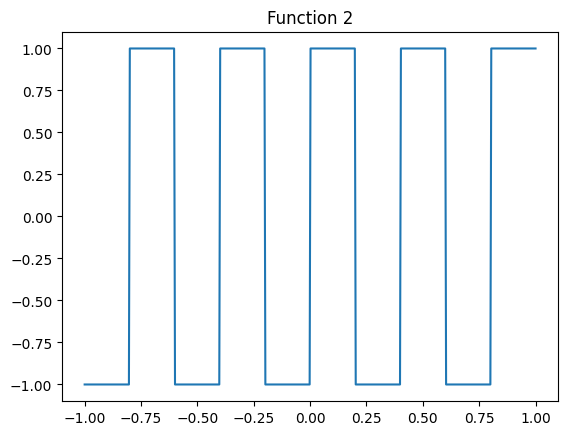

In [24]:
plt.plot(x, y)
plt.title("Function 2")

In [25]:
losses = []
predictions = []

In [26]:
args = {"lr": 5e-5, "weight_decay": 1e-4}

### Model 1

In [27]:
loss, prediction = train(Model1(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=1.009327
epoch:2000,loss=0.994220
epoch:3000,loss=0.978567
epoch:4000,loss=0.969254
epoch:5000,loss=0.951561
epoch:6000,loss=0.918292
epoch:7000,loss=0.887416
epoch:8000,loss=0.833380
epoch:9000,loss=0.767923
epoch:10000,loss=0.672871
epoch:11000,loss=0.563291
epoch:12000,loss=0.371322
epoch:13000,loss=0.228605
epoch:14000,loss=0.149059
epoch:15000,loss=0.103913
epoch:16000,loss=0.082925
epoch:17000,loss=0.070342
epoch:18000,loss=0.062071
epoch:19000,loss=0.055704
epoch:20000,loss=0.043759
epoch:21000,loss=0.038280
epoch:22000,loss=0.034267
epoch:23000,loss=0.030999
epoch:24000,loss=0.028116
epoch:25000,loss=0.025728
epoch:26000,loss=0.023766
epoch:27000,loss=0.022119
epoch:28000,loss=0.020614
epoch:29000,loss=0.019232
epoch:30000,loss=0.018011
epoch:31000,loss=0.016935
epoch:32000,loss=0.016055
epoch:33000,loss=0.015157
epoch:34000,loss=0.014426
epoch:35000,loss=0.013787
epoch:36000,loss=0.013207
epoch:37000,loss=0.012649
epoch:38000,loss=0.012123
epoch:39000,loss=0.01

Text(0.5, 1.0, 'Model 1 Loss')

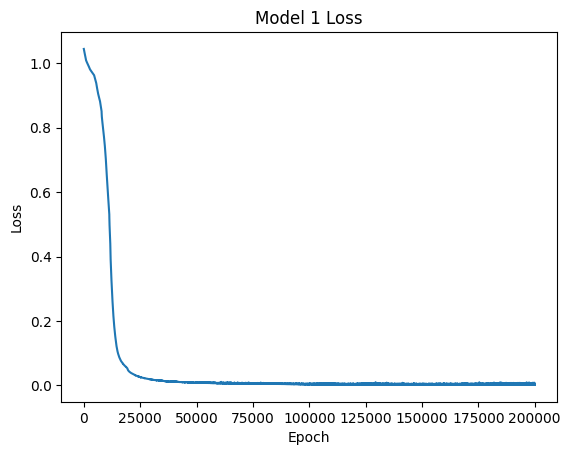

In [28]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 1 Loss")

Text(0.5, 1.0, 'Model 1 Prediction')

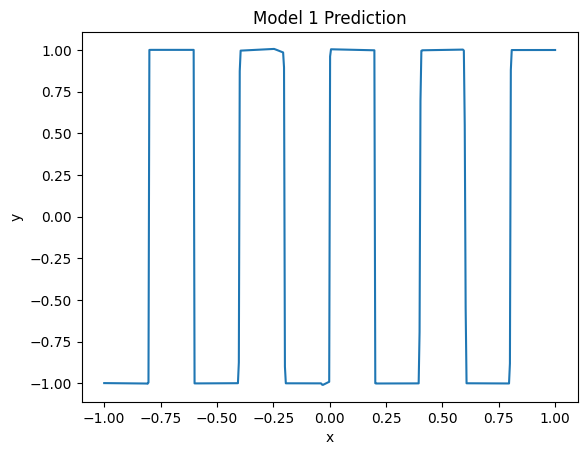

In [29]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 1 Prediction")

### Model 2

In [30]:
loss, prediction = train(Model2(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.985603
epoch:2000,loss=0.972674
epoch:3000,loss=0.943441
epoch:4000,loss=0.909667
epoch:5000,loss=0.869703
epoch:6000,loss=0.835642
epoch:7000,loss=0.793958
epoch:8000,loss=0.719285
epoch:9000,loss=0.630419
epoch:10000,loss=0.541698
epoch:11000,loss=0.469409
epoch:12000,loss=0.421742
epoch:13000,loss=0.392576
epoch:14000,loss=0.373995
epoch:15000,loss=0.360869
epoch:16000,loss=0.351345
epoch:17000,loss=0.344153
epoch:18000,loss=0.338307
epoch:19000,loss=0.333591
epoch:20000,loss=0.329528
epoch:21000,loss=0.326025
epoch:22000,loss=0.323082
epoch:23000,loss=0.320103
epoch:24000,loss=0.308211
epoch:25000,loss=0.301933
epoch:26000,loss=0.298397
epoch:27000,loss=0.295645
epoch:28000,loss=0.293459
epoch:29000,loss=0.291708
epoch:30000,loss=0.290373
epoch:31000,loss=0.289212
epoch:32000,loss=0.288183
epoch:33000,loss=0.287303
epoch:34000,loss=0.286570
epoch:35000,loss=0.285900
epoch:36000,loss=0.285299
epoch:37000,loss=0.284745
epoch:38000,loss=0.284220
epoch:39000,loss=0.28

Text(0.5, 1.0, 'Model 2 Loss')

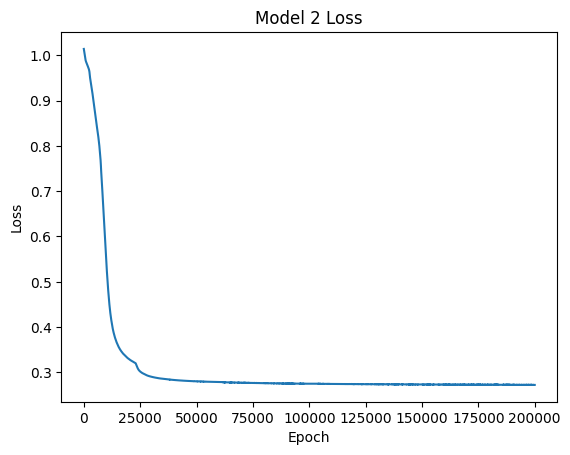

In [31]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 2 Loss")

Text(0.5, 1.0, 'Model 2 Prediction')

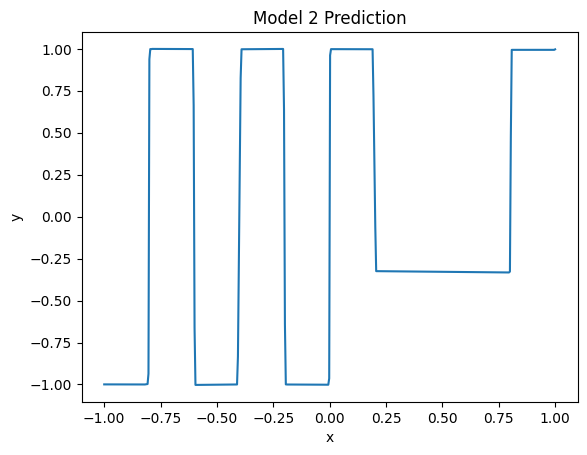

In [32]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 2 Prediction")

### Model 3

In [33]:
loss, prediction = train(Model3(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.935251
epoch:2000,loss=0.906523
epoch:3000,loss=0.881700
epoch:4000,loss=0.856880
epoch:5000,loss=0.833199
epoch:6000,loss=0.810385
epoch:7000,loss=0.788704
epoch:8000,loss=0.768388
epoch:9000,loss=0.749359
epoch:10000,loss=0.731361
epoch:11000,loss=0.714205
epoch:12000,loss=0.697566
epoch:13000,loss=0.681323
epoch:14000,loss=0.665477
epoch:15000,loss=0.649896
epoch:16000,loss=0.634561
epoch:17000,loss=0.619535
epoch:18000,loss=0.604684
epoch:19000,loss=0.590191
epoch:20000,loss=0.575867
epoch:21000,loss=0.561969
epoch:22000,loss=0.548316
epoch:23000,loss=0.534967
epoch:24000,loss=0.521654
epoch:25000,loss=0.508544
epoch:26000,loss=0.495692
epoch:27000,loss=0.482880
epoch:28000,loss=0.470183
epoch:29000,loss=0.457677
epoch:30000,loss=0.445270
epoch:31000,loss=0.433033
epoch:32000,loss=0.417399
epoch:33000,loss=0.400522
epoch:34000,loss=0.385096
epoch:35000,loss=0.369828
epoch:36000,loss=0.354745
epoch:37000,loss=0.339941
epoch:38000,loss=0.325499
epoch:39000,loss=0.31

Text(0.5, 1.0, 'Model 3 Loss')

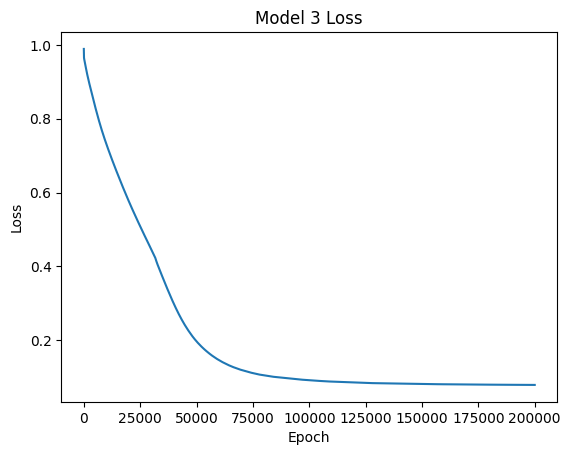

In [34]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 3 Loss")

Text(0.5, 1.0, 'Model 3 Prediction')

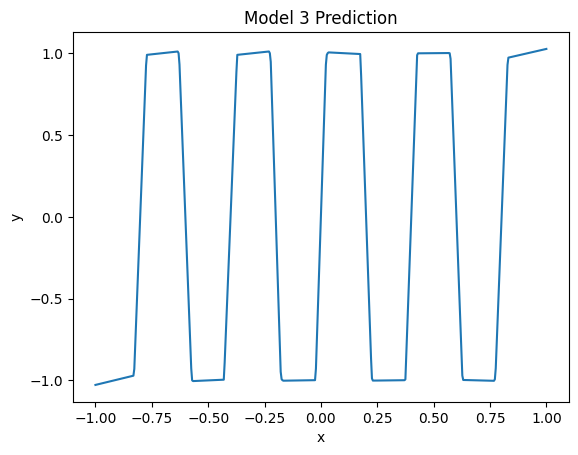

In [35]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 3 Prediction")

### Result

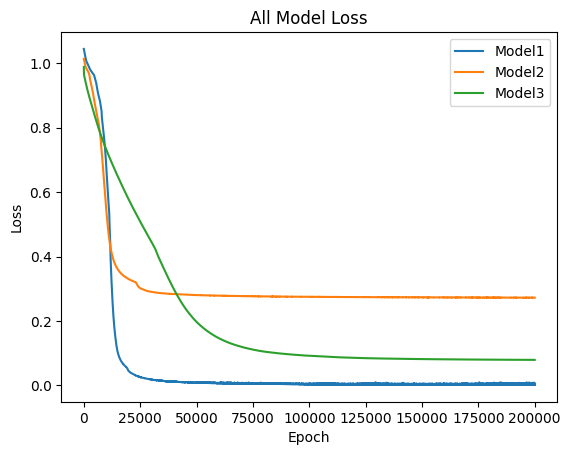

In [36]:
plot_losses(losses)

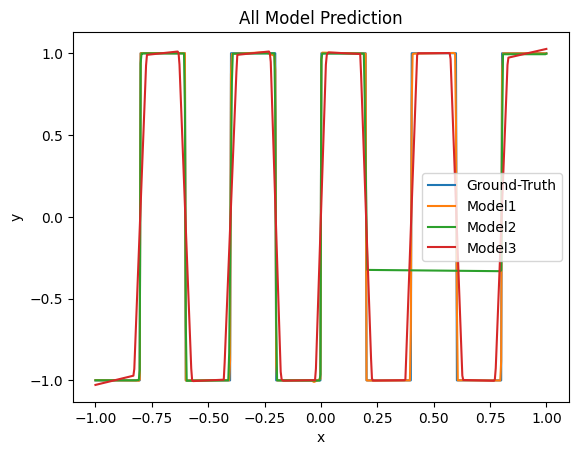

In [37]:
plot_predictions(x, y, predictions)

## Function 3

$$x^2$$

In [38]:
x = torch.linspace(-1, 1, 5300, dtype=torch.float).unsqueeze(1)
y = np.power(x, 2)

Text(0.5, 1.0, 'Function 3')

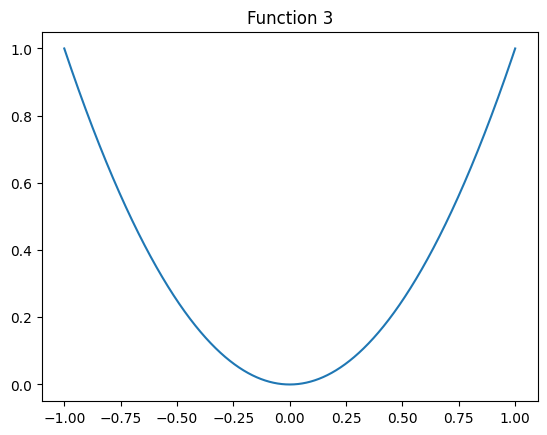

In [39]:
plt.plot(x, y)
plt.title("Function 3")

In [40]:
losses = []
predictions = []

In [41]:
args = {"lr": 1e-4, "weight_decay": 1e-4}

### Model 1

In [42]:
loss, prediction = train(Model1(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.088679
epoch:2000,loss=0.085562
epoch:3000,loss=0.033064


Text(0.5, 1.0, 'Model 1 Loss')

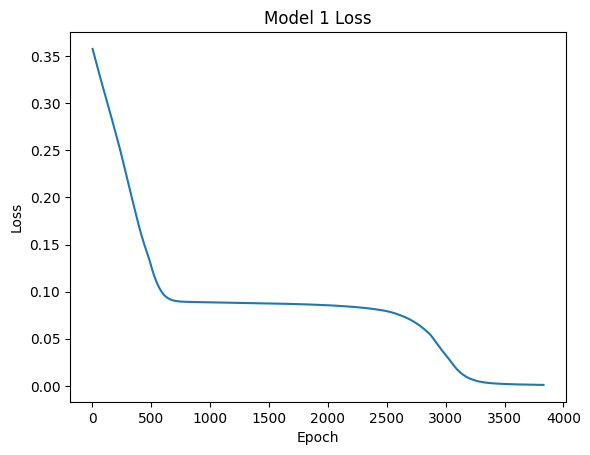

In [43]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 1 Loss")

Text(0.5, 1.0, 'Model 1 Prediction')

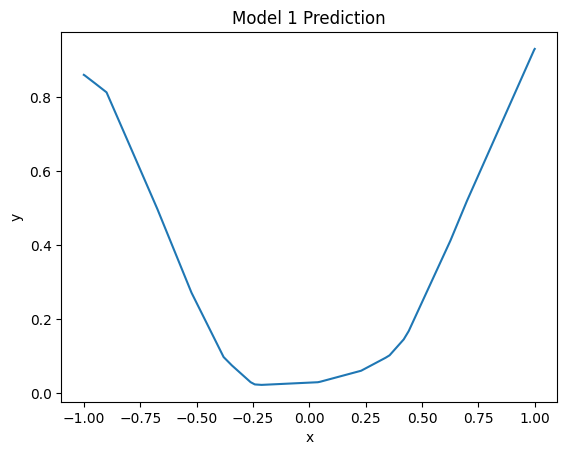

In [44]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 1 Prediction")

### Model 2

In [45]:
loss, prediction = train(Model2(), args, x, y)
losses.append(loss)
predictions.append(prediction)

epoch:1000,loss=0.022558
epoch:2000,loss=0.004009
epoch:3000,loss=0.001159


Text(0.5, 1.0, 'Model 2 Loss')

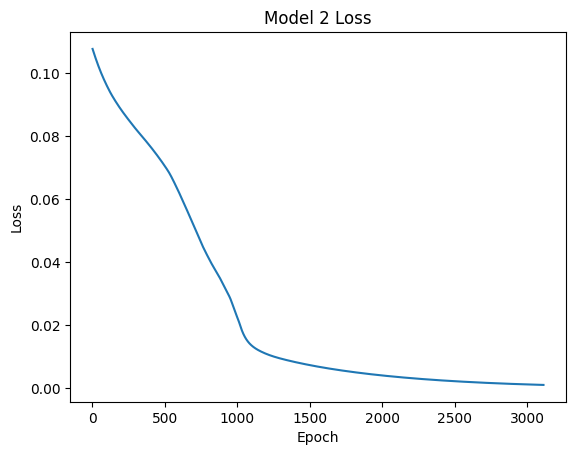

In [46]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 2 Loss")

Text(0.5, 1.0, 'Model 2 Prediction')

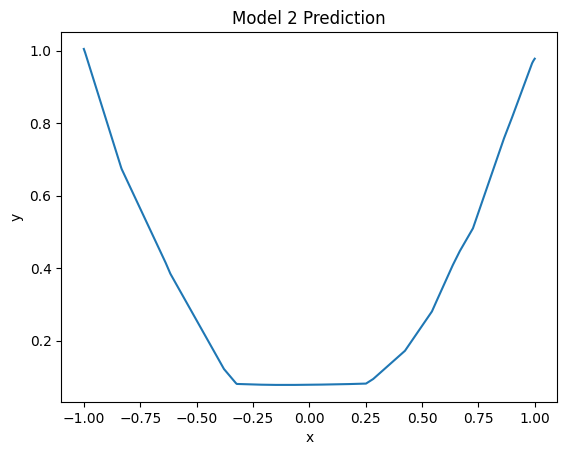

In [47]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 2 Prediction")

### Model 3

In [48]:
loss, prediction = train(Model3(), args, x, y)
losses.append(loss)
predictions.append(prediction)

Text(0.5, 1.0, 'Model 3 Loss')

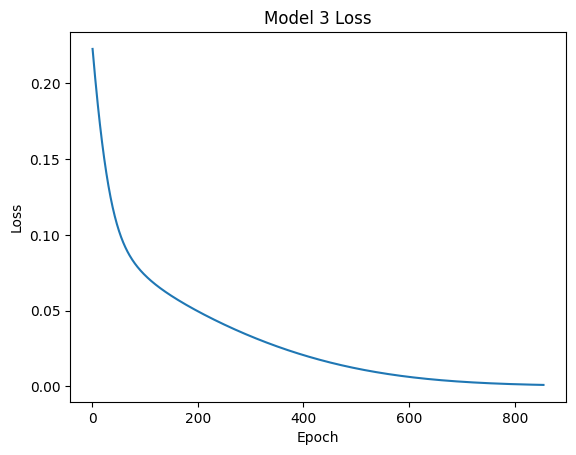

In [49]:
plt.plot(np.arange(1, len(loss) + 1), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model 3 Loss")

Text(0.5, 1.0, 'Model 3 Prediction')

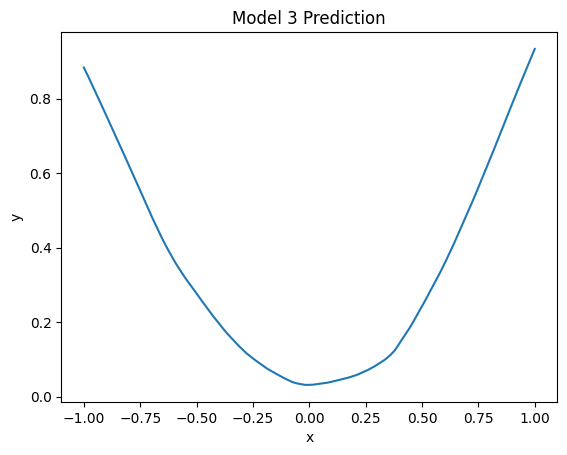

In [50]:
plt.plot(x, prediction.detach().numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model 3 Prediction")

### Result

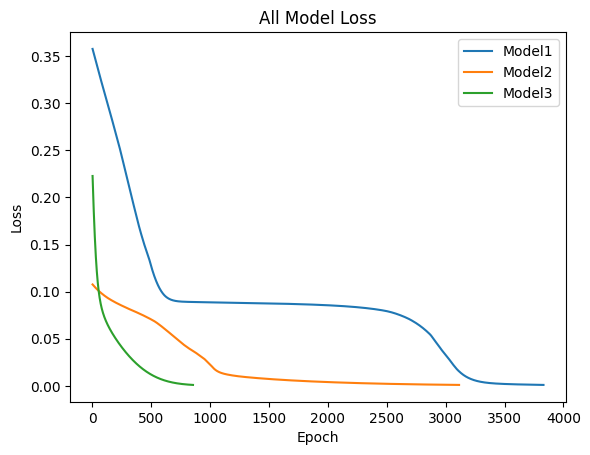

In [51]:
plot_losses(losses)

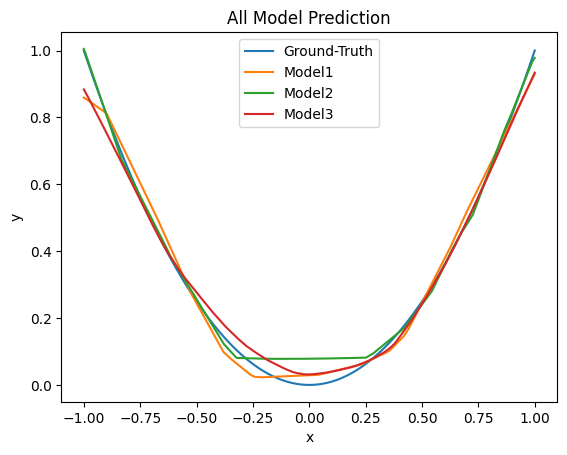

In [52]:
plot_predictions(x, y, predictions)